In [1]:
import numpy as np
import pandas as pd

In [49]:
import geopandas as gpd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys
sys.path.insert(1, '../tools')
from data_tools import *

In [50]:
import re

# Shapefile

In [204]:
bay_area_map = gpd.read_file('../data/bay_area_counties.geojson')

In [305]:
min_df = bay_area_map.geometry.bounds[['minx','miny']]
max_df = bay_area_map.geometry.bounds[['maxx','maxy']]

In [309]:
max_val = max_df.values.max(axis=0)
min_val = min_df.values.min(axis=0)

In [324]:
# bay area boundary
long_range = np.row_stack([min_val,max_val])[:,0]
lat_range = np.row_stack([min_val,max_val])[:,1]

# Business Info DataFrame

In [338]:
business_info = pd.read_csv('../data/all_businesses_info.csv')

In [339]:
sub_con = (business_info.longitude.between(long_range[0],long_range[1])) & \
            (business_info.latitude.between(lat_range[0],lat_range[1]))
# drop businesses outside of Bay Area
business_info = business_info[sub_con]

In [340]:
def fixed_capitalize(in_str):
    return ' '.join([i.capitalize() for i in in_str.strip().split(' ')])

In [341]:
# fix city name format
business_info['city'] = [fixed_capitalize(i) for i in business_info['city']]

In [342]:
geo_xy = gpd.points_from_xy(business_info.longitude, business_info.latitude)
geo_business_info = gpd.GeoDataFrame(business_info, geometry=geo_xy, crs=crs)

In [344]:
geo_business_info.head()

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,transactions3,address1,address2,address3,city,zip_code,country,state,display_address,geometry
0,ucXuxH-JOwyL_hi0uzXjVw,lovina-calistoga,Lovina,https://s3-media1.fl.yelpcdn.com/bphoto/fiMg4W...,False,https://www.yelp.com/biz/lovina-calistoga?adju...,327,4.0,$$,1.707943e+10,...,NaN,1107 Cedar St,NaN,NaN,Calistoga,94515.0,US,CA,"1107 Cedar St, Calistoga, CA 94515",POINT (-122.57964 38.57659)
1,U69SHL0P_DGbjaB8TNIwLg,sams-social-club-calistoga-2,Sam's Social Club,https://s3-media1.fl.yelpcdn.com/bphoto/uzjx9K...,False,https://www.yelp.com/biz/sams-social-club-cali...,640,4.0,$$,1.707942e+10,...,NaN,1712 Lincoln Ave,NaN,NaN,Calistoga,94515.0,US,CA,"1712 Lincoln Ave, Calistoga, CA 94515",POINT (-122.57525 38.58221)
2,XITkuNFTKXeDKotFD9dPxA,solbar-calistoga,SolBar,https://s3-media1.fl.yelpcdn.com/bphoto/_5YbbL...,False,https://www.yelp.com/biz/solbar-calistoga?adju...,1047,4.0,$$$,1.707226e+10,...,NaN,755 Silverado Trl,NaN,Solage Hotel,Calistoga,94515.0,US,CA,"755 Silverado Trl, Solage Hotel, Calistoga, CA...",POINT (-122.57026 38.58506)
3,41jZtOex0ITMwM353GYUFw,evangeline-calistoga,Evangeline,https://s3-media1.fl.yelpcdn.com/bphoto/fkquwF...,False,https://www.yelp.com/biz/evangeline-calistoga?...,375,4.0,$$,1.707341e+10,...,NaN,1226 Washington St,NaN,NaN,Calistoga,94515.0,US,CA,"1226 Washington St, Calistoga, CA 94515",POINT (-122.57948 38.57905)
4,yPLq0SrnSnkTH1jQfgVMTA,calistoga-inn-calistoga-7,Calistoga Inn,https://s3-media1.fl.yelpcdn.com/bphoto/BRpXx4...,False,https://www.yelp.com/biz/calistoga-inn-calisto...,611,4.0,$$,1.707942e+10,...,NaN,1250 Lincoln Ave,NaN,NaN,Calistoga,94515.0,US,CA,"1250 Lincoln Ave, Calistoga, CA 94515",POINT (-122.57962 38.57693)


# Plot Map

In [350]:
geo_business_info.price.unique

<bound method Series.unique of 0         $$
1         $$
2        $$$
3         $$
4         $$
        ... 
19217     $$
19218      $
19219      $
19220    NaN
19222      $
Name: price, Length: 19183, dtype: object>

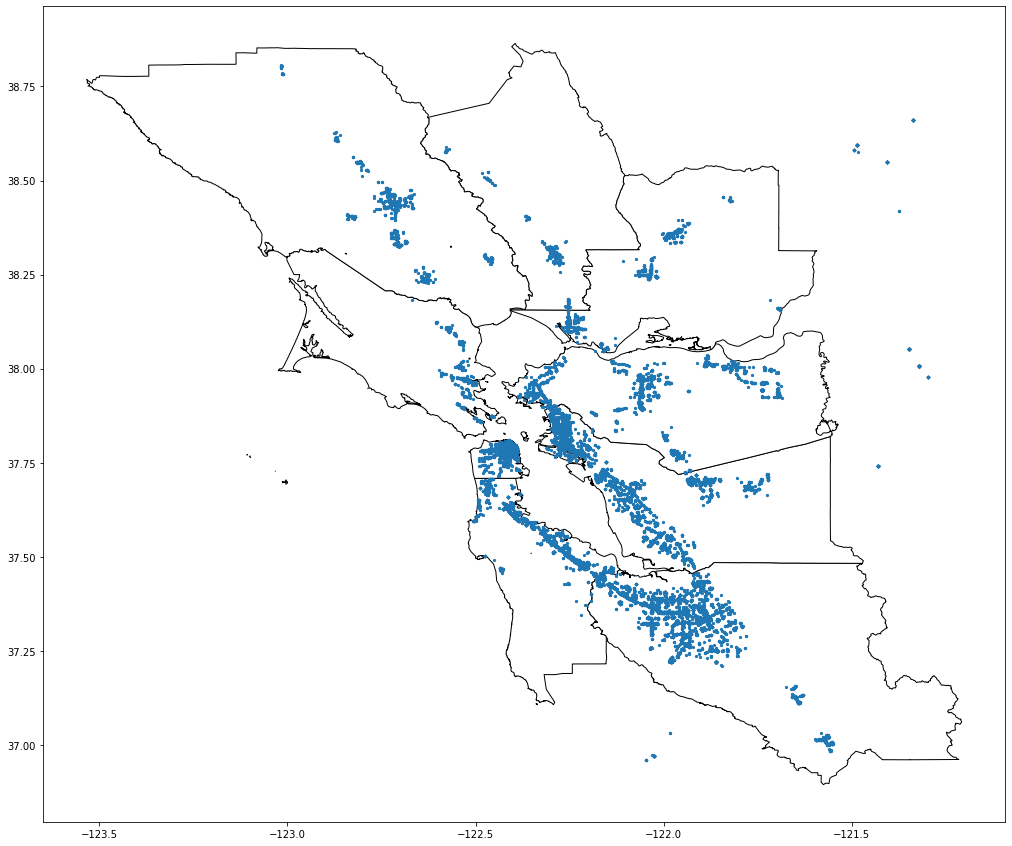

In [346]:
fig,ax = plt.subplots(figsize=(20,15))
bay_area_map.geometry.plot(ax=ax, color='white', edgecolor='black')
geo_business_info.geometry.plot(ax=ax, markersize=5)
plt.show()